<h1>ANN for Dataset 1</h1>


In [184]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('white')

# Importing the dataset
dataset = pd.read_csv('energydata_complete.csv')
dataset=dataset.drop(['date','lights'],axis=1)

dataset["consumption_level"]=[1 if x>=dataset["Appliances"].mean() else 0 for x in dataset["Appliances"]]


X = dataset.iloc[:,1:27].values #X = dataset.iloc[:,1:].values

y = dataset.iloc[:,27].values

#part 1
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)





dataset.head()
y


X.shape

(19735, 26)

In [185]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h2> First neural net</h2>

In [158]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=26, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 200,validation_split=0.3)



Train on 9669 samples, validate on 4145 samples
Epoch 1/200
9669/9669 [==============================] - 7s 706us/step - loss: 0.5536 - acc: 0.7310 - val_loss: 0.4958 - val_acc: 0.7409
Epoch 2/200
9669/9669 [==============================] - 3s 340us/step - loss: 0.4948 - acc: 0.7319 - val_loss: 0.4701 - val_acc: 0.7409
Epoch 3/200
9669/9669 [==============================] - 3s 328us/step - loss: 0.4798 - acc: 0.7601 - val_loss: 0.4598 - val_acc: 0.7768
Epoch 4/200
9669/9669 [==============================] - 3s 339us/step - loss: 0.4725 - acc: 0.7792 - val_loss: 0.4536 - val_acc: 0.7821
Epoch 5/200
9669/9669 [==============================] - 4s 371us/step - loss: 0.4651 - acc: 0.7846 - val_loss: 0.4475 - val_acc: 0.7834
Epoch 6/200
9669/9669 [==============================] - 3s 340us/step - loss: 0.4601 - acc: 0.7867 - val_loss: 0.4414 - val_acc: 0.7920
Epoch 7/200
9669/9669 [==============================] - 3s 326us/step - loss: 0.4540 - acc: 0.7912 - val_loss: 0.4340 - val_acc: 

In [159]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[3977  399]
 [ 687  858]] 

The accuracy is 0.8165850363114339


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


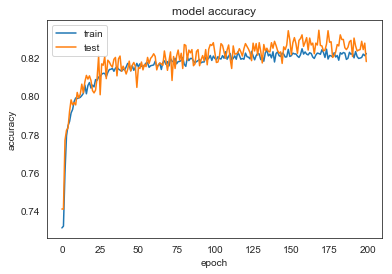

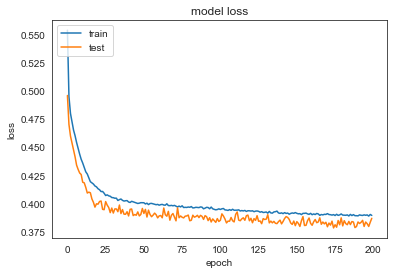

In [160]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Second Neural Net</h2>

In [161]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=26, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 1000,validation_split=0.3)



Train on 9669 samples, validate on 4145 samples
Epoch 1/1000
9669/9669 [==============================] - 3s 308us/step - loss: 0.5537 - acc: 0.7317 - val_loss: 0.4908 - val_acc: 0.7409
Epoch 2/1000
9669/9669 [==============================] - 1s 145us/step - loss: 0.4938 - acc: 0.7319 - val_loss: 0.4671 - val_acc: 0.7409
Epoch 3/1000
9669/9669 [==============================] - 1s 144us/step - loss: 0.4774 - acc: 0.7722 - val_loss: 0.4549 - val_acc: 0.7875
Epoch 4/1000
9669/9669 [==============================] - 1s 150us/step - loss: 0.4682 - acc: 0.7814 - val_loss: 0.4536 - val_acc: 0.7850
Epoch 5/1000
9669/9669 [==============================] - 1s 152us/step - loss: 0.4616 - acc: 0.7897 - val_loss: 0.4430 - val_acc: 0.7954
Epoch 6/1000
9669/9669 [==============================] - 1s 152us/step - loss: 0.4559 - acc: 0.7916 - val_loss: 0.4369 - val_acc: 0.7957
Epoch 7/1000
9669/9669 [==============================] - 1s 151us/step - loss: 0.4502 - acc: 0.7939 - val_loss: 0.4334 - va

In [163]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[3916  460]
 [ 560  985]] 

The accuracy is 0.8277318020604627


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


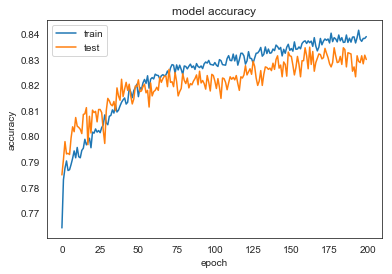

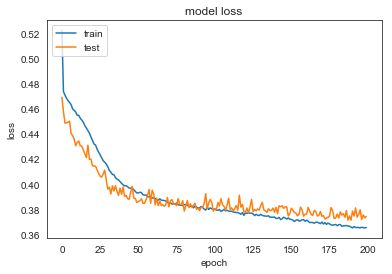

In [165]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Third Neural Net</h2>

In [164]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="tanh", input_dim=26, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="tanh", units=6, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="tanh", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 200,validation_split=0.3)



Train on 9669 samples, validate on 4145 samples
Epoch 1/200
9669/9669 [==============================] - 3s 352us/step - loss: 0.5226 - acc: 0.7641 - val_loss: 0.4692 - val_acc: 0.7848
Epoch 2/200
9669/9669 [==============================] - 2s 158us/step - loss: 0.4738 - acc: 0.7829 - val_loss: 0.4577 - val_acc: 0.7908
Epoch 3/200
9669/9669 [==============================] - 1s 154us/step - loss: 0.4708 - acc: 0.7875 - val_loss: 0.4486 - val_acc: 0.7978
Epoch 4/200
9669/9669 [==============================] - 2s 176us/step - loss: 0.4685 - acc: 0.7903 - val_loss: 0.4489 - val_acc: 0.7930
Epoch 5/200
9669/9669 [==============================] - 1s 148us/step - loss: 0.4665 - acc: 0.7865 - val_loss: 0.4493 - val_acc: 0.7932
Epoch 6/200
9669/9669 [==============================] - 2s 156us/step - loss: 0.4652 - acc: 0.7868 - val_loss: 0.4502 - val_acc: 0.7928
Epoch 7/200
9669/9669 [==============================] - 2s 185us/step - loss: 0.4633 - acc: 0.7889 - val_loss: 0.4404 - val_acc: 

In [166]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[3935  441]
 [ 556  989]] 

The accuracy is 0.8316162810336092


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


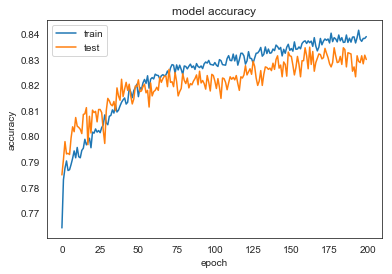

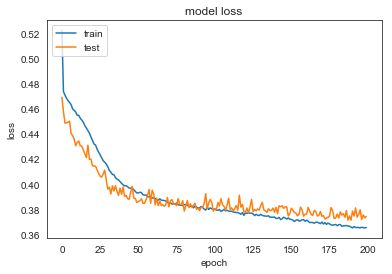

In [167]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Fourth Neural Net</h2>

In [168]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="tanh", input_dim=26, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="tanh", units=6, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="tanh", units=6, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="tanh", units=6, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="tanh", units=6, kernel_initializer="uniform"))


# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 200,validation_split=0.3)



Train on 9669 samples, validate on 4145 samples
Epoch 1/200
9669/9669 [==============================] - 3s 358us/step - loss: 0.5311 - acc: 0.7582 - val_loss: 0.4655 - val_acc: 0.7918
Epoch 2/200
9669/9669 [==============================] - 2s 189us/step - loss: 0.4762 - acc: 0.7846 - val_loss: 0.4589 - val_acc: 0.7906
Epoch 3/200
9669/9669 [==============================] - 2s 172us/step - loss: 0.4727 - acc: 0.7849 - val_loss: 0.4530 - val_acc: 0.7930
Epoch 4/200
9669/9669 [==============================] - 2s 174us/step - loss: 0.4694 - acc: 0.7885 - val_loss: 0.4538 - val_acc: 0.7899
Epoch 5/200
9669/9669 [==============================] - 2s 163us/step - loss: 0.4669 - acc: 0.7914 - val_loss: 0.4442 - val_acc: 0.8019
Epoch 6/200
9669/9669 [==============================] - 2s 167us/step - loss: 0.4655 - acc: 0.7902 - val_loss: 0.4466 - val_acc: 0.8010
Epoch 7/200
9669/9669 [==============================] - 2s 166us/step - loss: 0.4646 - acc: 0.7905 - val_loss: 0.4429 - val_acc: 

In [171]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[3989  387]
 [ 600  945]] 

The accuracy is 0.8333051849349772


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


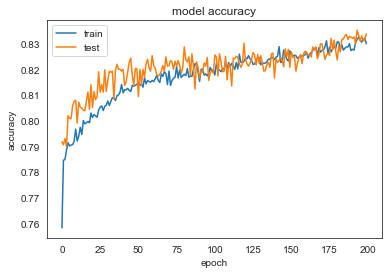

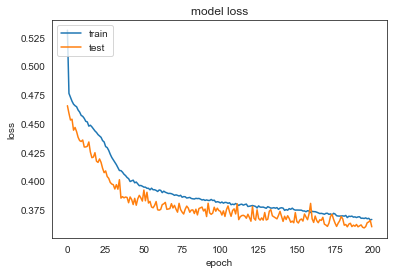

In [172]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Fifth Neural net </h2>

In [47]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="tanh", input_dim=26, units=14, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))


# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 200,validation_split=0.3)



Train on 9669 samples, validate on 4145 samples
Epoch 1/200
9669/9669 [==============================] - 2s 193us/step - loss: 0.5089 - acc: 0.7696 - val_loss: 0.4660 - val_acc: 0.7846
Epoch 2/200
9669/9669 [==============================] - 1s 125us/step - loss: 0.4771 - acc: 0.7800 - val_loss: 0.4602 - val_acc: 0.7882
Epoch 3/200
9669/9669 [==============================] - 1s 116us/step - loss: 0.4734 - acc: 0.7858 - val_loss: 0.4636 - val_acc: 0.7802
Epoch 4/200
9669/9669 [==============================] - 1s 117us/step - loss: 0.4699 - acc: 0.7850 - val_loss: 0.4547 - val_acc: 0.7961
Epoch 5/200
9669/9669 [==============================] - 1s 116us/step - loss: 0.4706 - acc: 0.7865 - val_loss: 0.4457 - val_acc: 0.7976
Epoch 6/200
9669/9669 [==============================] - 1s 116us/step - loss: 0.4685 - acc: 0.7852 - val_loss: 0.4442 - val_acc: 0.7986
Epoch 7/200
9669/9669 [==============================] - 1s 115us/step - loss: 0.4689 - acc: 0.7841 - val_loss: 0.4453 - val_acc: 

In [48]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[4048  328]
 [ 499 1046]] 

The accuracy is 0.8603276473568654


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


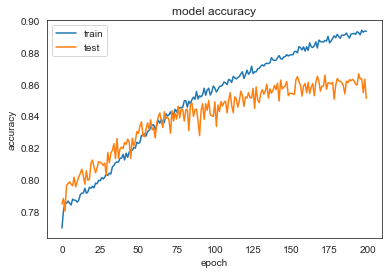

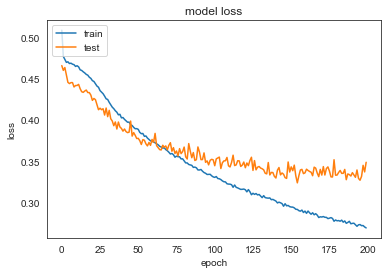

In [49]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2> Sixth Neural Net </h2>
<h3> Neural network with 10 hidden layers </h3> <B>Bit Extreme</B>

In [50]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="tanh", input_dim=26, units=14, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))

# Adding the sixth hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))
# Adding the seventh hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))
# Adding the eighth hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))
# Adding the ninth hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))
# Adding the tenth hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 200,validation_split=0.3)



Train on 9669 samples, validate on 4145 samples
Epoch 1/200
9669/9669 [==============================] - 2s 243us/step - loss: 0.5200 - acc: 0.7563 - val_loss: 0.4661 - val_acc: 0.7846
Epoch 2/200
9669/9669 [==============================] - 1s 143us/step - loss: 0.4798 - acc: 0.7813 - val_loss: 0.4580 - val_acc: 0.7969
Epoch 3/200
9669/9669 [==============================] - 1s 144us/step - loss: 0.4760 - acc: 0.7833 - val_loss: 0.4516 - val_acc: 0.7911
Epoch 4/200
9669/9669 [==============================] - 1s 148us/step - loss: 0.4737 - acc: 0.7833 - val_loss: 0.4516 - val_acc: 0.7954
Epoch 5/200
9669/9669 [==============================] - 1s 142us/step - loss: 0.4727 - acc: 0.7841 - val_loss: 0.4608 - val_acc: 0.7920
Epoch 6/200
9669/9669 [==============================] - 1s 142us/step - loss: 0.4715 - acc: 0.7888 - val_loss: 0.4489 - val_acc: 0.7981
Epoch 7/200
9669/9669 [==============================] - 1s 142us/step - loss: 0.4695 - acc: 0.7894 - val_loss: 0.4663 - val_acc: 

In [51]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[3959  417]
 [ 470 1075]] 

The accuracy is 0.8501942239486573


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


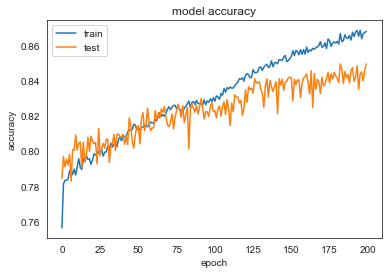

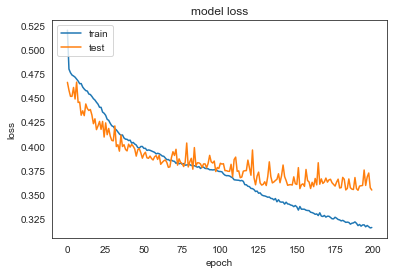

In [52]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2> Seventh Neural Net </h2>
Doing with 5 hidden layers as there was not much improvement with 10 hidden layers and changing the activation function to sigmoid in every layer

In [53]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="sigmoid", input_dim=26, units=14, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="sigmoid", units=14, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="sigmoid", units=14, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="sigmoid", units=14, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="sigmoid", units=14, kernel_initializer="uniform"))


# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 200,validation_split=0.3)



Train on 9669 samples, validate on 4145 samples
Epoch 1/200
9669/9669 [==============================] - 2s 213us/step - loss: 0.5860 - acc: 0.7319 - val_loss: 0.5743 - val_acc: 0.7409
Epoch 2/200
9669/9669 [==============================] - 1s 128us/step - loss: 0.5812 - acc: 0.7319 - val_loss: 0.5716 - val_acc: 0.7409
Epoch 3/200
9669/9669 [==============================] - 1s 134us/step - loss: 0.5795 - acc: 0.7319 - val_loss: 0.5683 - val_acc: 0.7409
Epoch 4/200
9669/9669 [==============================] - 1s 127us/step - loss: 0.5754 - acc: 0.7319 - val_loss: 0.5609 - val_acc: 0.7409
Epoch 5/200
9669/9669 [==============================] - 1s 126us/step - loss: 0.5617 - acc: 0.7319 - val_loss: 0.5377 - val_acc: 0.7409
Epoch 6/200
9669/9669 [==============================] - 1s 125us/step - loss: 0.5299 - acc: 0.7319 - val_loss: 0.4994 - val_acc: 0.7409
Epoch 7/200
9669/9669 [==============================] - 1s 127us/step - loss: 0.5028 - acc: 0.7319 - val_loss: 0.4816 - val_acc: 

In [54]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[3951  425]
 [ 525 1020]] 

The accuracy is 0.8395541293700388


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


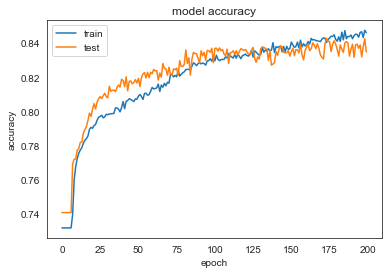

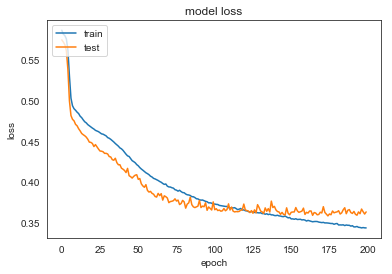

In [55]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2> Eigth Neural Net </h2>

In [56]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=26, units=14, kernel_initializer="glorot_normal"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="glorot_normal"))

# Adding the third hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="glorot_normal"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="glorot_normal"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="glorot_normal"))


# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="glorot_normal"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 200,validation_split=0.3)



Train on 9669 samples, validate on 4145 samples
Epoch 1/200
9669/9669 [==============================] - 2s 212us/step - loss: 0.5316 - acc: 0.7523 - val_loss: 0.4666 - val_acc: 0.7800
Epoch 2/200
9669/9669 [==============================] - 1s 126us/step - loss: 0.4669 - acc: 0.7829 - val_loss: 0.4539 - val_acc: 0.7875
Epoch 3/200
9669/9669 [==============================] - 1s 124us/step - loss: 0.4472 - acc: 0.7914 - val_loss: 0.4285 - val_acc: 0.8027
Epoch 4/200
9669/9669 [==============================] - 1s 125us/step - loss: 0.4329 - acc: 0.7962 - val_loss: 0.4231 - val_acc: 0.8007
Epoch 5/200
9669/9669 [==============================] - 1s 122us/step - loss: 0.4236 - acc: 0.8009 - val_loss: 0.4098 - val_acc: 0.8087
Epoch 6/200
9669/9669 [==============================] - 1s 137us/step - loss: 0.4140 - acc: 0.8074 - val_loss: 0.4072 - val_acc: 0.8159
Epoch 7/200
9669/9669 [==============================] - 1s 124us/step - loss: 0.4053 - acc: 0.8100 - val_loss: 0.4022 - val_acc: 

In [57]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[3917  459]
 [ 416 1129]] 

The accuracy is 0.852220908630299


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


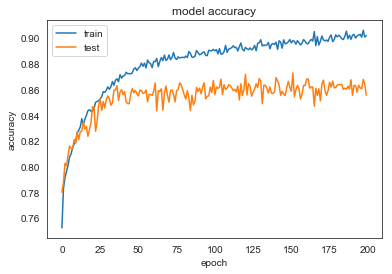

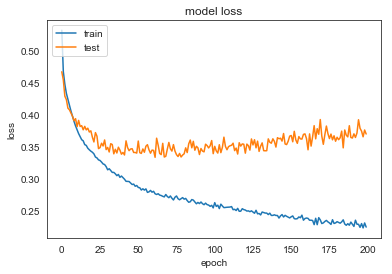

In [58]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h1> KNN for Dataset 1</h1>
<h2>Euclidian Distance</h2>
First Experiment k=5

In [128]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)

cm

array([[4100,  276],
       [ 539, 1006]], dtype=int64)

In [129]:
report=classification_report(y_test,y_pred)
accu_KNN_5=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=5\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using K-cross validation with 10 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds\n",std*100,end='\n')


KNN with n=5


The Confusion Matrix
 [[4100  276]
 [ 539 1006]]
The Classification report
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4376
           1       0.78      0.65      0.71      1545

    accuracy                           0.86      5921
   macro avg       0.83      0.79      0.81      5921
weighted avg       0.86      0.86      0.86      5921

The Accuracy score with only 1 Training and Testing Data Set
 86.2354332038507
The mean of the accuracy scores with using K-cross validation with 10 folds
 85.50034760581106
The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds
 1.164966996879961


W1104 19:38:52.535013 18972 legend.py:1289] No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

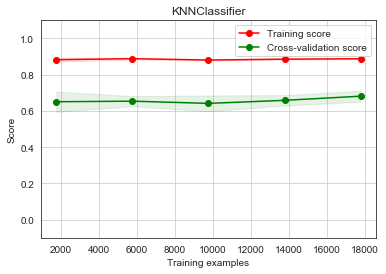

In [130]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, X, y,cv=10,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show

<h2>Euclidian Distance</h2>
First Experiment k=3

In [138]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)

cm

array([[4058,  318],
       [ 476, 1069]], dtype=int64)

In [139]:
report=classification_report(y_test,y_pred)
accu_KNN_5=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=3\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using K-cross validation with 10 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds\n",std*100,end='\n')


KNN with n=3


The Confusion Matrix
 [[4058  318]
 [ 476 1069]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      4376
           1       0.77      0.69      0.73      1545

    accuracy                           0.87      5921
   macro avg       0.83      0.81      0.82      5921
weighted avg       0.86      0.87      0.86      5921

The Accuracy score with only 1 Training and Testing Data Set
 86.59010302313798
The mean of the accuracy scores with using K-cross validation with 10 folds
 85.67398270740064
The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds
 1.2449113141890824


W1104 19:46:45.341529 18972 legend.py:1289] No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

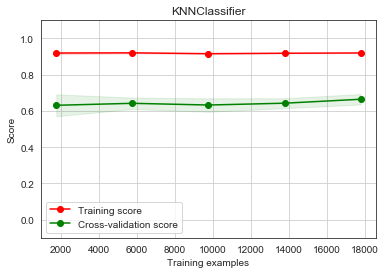

In [140]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, X, y,cv=10,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show

<h2> Grid search for k with Euclidian Distance </h2>

In [141]:
#playing around with the KNN with n parameter to get the best n
#performing grid search to find the best value of n in KNN and the most efficient values for Hyperparameters
# Applying Grid Search to find the best model and the best parameters
# Fitting a general classifier to use in Grid Search to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(metric = 'minkowski')
classifier.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': range(2,40),'p':[2]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy,end='\n')
print(best_parameters,end='\n')

0.8567395395975098
{'n_neighbors': 3, 'p': 2}


Text(0, 0.5, 'Mean Error')

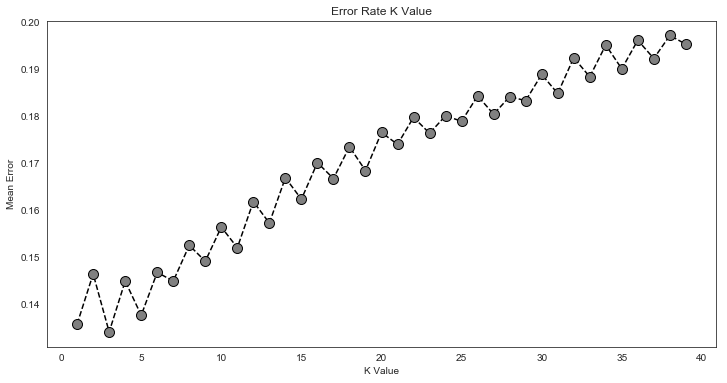

In [142]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i,p=2,metric='minkowski')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='grey', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

<h2>  KNN with Manhatten Distance</h2>
First experiment k=5

In [146]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)

cm

array([[4119,  257],
       [ 423, 1122]], dtype=int64)

In [147]:
report=classification_report(y_test,y_pred)
accu_KNN_5=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=5\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using K-cross validation with 10 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds\n",std*100,end='\n')


KNN with n=5


The Confusion Matrix
 [[4119  257]
 [ 423 1122]]
The Classification report
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      4376
           1       0.81      0.73      0.77      1545

    accuracy                           0.89      5921
   macro avg       0.86      0.83      0.85      5921
weighted avg       0.88      0.89      0.88      5921

The Accuracy score with only 1 Training and Testing Data Set
 88.51545347069751
The mean of the accuracy scores with using K-cross validation with 10 folds
 87.91814653143149
The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds
 1.26146030947414


W1104 20:29:59.158429 18972 legend.py:1289] No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

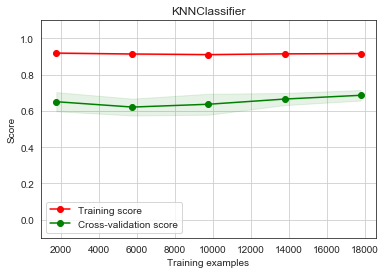

In [148]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, X, y,cv=10,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show

<h2>Second experiment k=3</h2>

In [189]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)

cm

array([[4090,  286],
       [ 388, 1157]], dtype=int64)

In [190]:
report=classification_report(y_test,y_pred)
accu_KNN_5=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=3\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using K-cross validation with 10 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds\n",std*100,end='\n')


KNN with n=3


The Confusion Matrix
 [[4090  286]
 [ 388 1157]]
The Classification report
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      4376
           1       0.80      0.75      0.77      1545

    accuracy                           0.89      5921
   macro avg       0.86      0.84      0.85      5921
weighted avg       0.88      0.89      0.88      5921

The Accuracy score with only 1 Training and Testing Data Set
 88.6167877047796
The mean of the accuracy scores with using K-cross validation with 10 folds
 88.04854462923431
The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds
 1.0260654192358178


W1104 22:49:56.392506 18972 legend.py:1289] No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

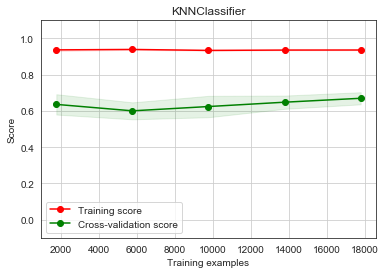

In [191]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, X, y,cv=10,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show

<h2> Grid search for k with Manhatten Distance </h2>

In [152]:
#playing around with the KNN with n parameter to get the best n
#performing grid search to find the best value of n in KNN and the most efficient values for Hyperparameters
# Applying Grid Search to find the best model and the best parameters
# Fitting a general classifier to use in Grid Search to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(metric = 'minkowski')
classifier.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': range(2,40),'p':[1]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy,end='\n')
print(best_parameters,end='\n')

0.880483567395396
{'n_neighbors': 3, 'p': 1}


Text(0, 0.5, 'Mean Error')

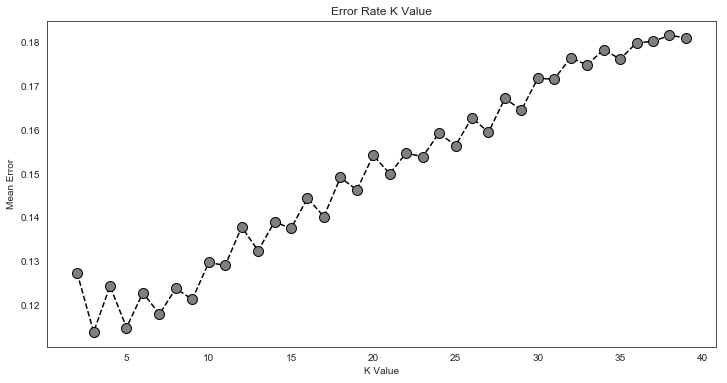

In [154]:
error = []

# Calculating error for K values between 1 and 40
for i in range(2, 40):
    knn = KNeighborsClassifier(n_neighbors=i,p=1,metric='minkowski')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(2, 40), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='grey', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

The best value for K is 3 which I have already done

<h1>Dataset 2 (Telecom Churn)<h1>

In [192]:
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

telcom = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
#first few rows
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [193]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nMissing values :  ", telcom.isnull().sum().values.sum())
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [194]:
telcom.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [195]:
# Converting Total Charges to a numerical data type.
telcom.TotalCharges = pd.to_numeric(telcom.TotalCharges, errors='coerce')
telcom.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [196]:
#Removing missing values 
telcom.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telcom.iloc[:,1:]
    #Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [197]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)






from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape

(4922, 45)

<h1>ANN for Dataset 2 (Telecom Churn)</h1>


<h2> First Neural Net</h2>
1000 epochs and 2 hidden layers and 14 neurons

In [70]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=45, units=14, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 1000,validation_split=0.3)



Train on 3445 samples, validate on 1477 samples
Epoch 1/1000
3445/3445 [==============================] - 1s 384us/step - loss: 0.5040 - acc: 0.7393 - val_loss: 0.4264 - val_acc: 0.7664
Epoch 2/1000
3445/3445 [==============================] - 0s 121us/step - loss: 0.4439 - acc: 0.7393 - val_loss: 0.4157 - val_acc: 0.7664
Epoch 3/1000
3445/3445 [==============================] - 0s 119us/step - loss: 0.4391 - acc: 0.7797 - val_loss: 0.4095 - val_acc: 0.8206
Epoch 4/1000
3445/3445 [==============================] - 0s 119us/step - loss: 0.4350 - acc: 0.7980 - val_loss: 0.4126 - val_acc: 0.8206
Epoch 5/1000
3445/3445 [==============================] - 0s 118us/step - loss: 0.4311 - acc: 0.7974 - val_loss: 0.4144 - val_acc: 0.8179
Epoch 6/1000
3445/3445 [==============================] - 0s 119us/step - loss: 0.4291 - acc: 0.7971 - val_loss: 0.4071 - val_acc: 0.8179
Epoch 7/1000
3445/3445 [==============================] - 0s 120us/step - loss: 0.4250 - acc: 0.8017 - val_loss: 0.4150 - va

In [71]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[1232  252]
 [ 304  322]] 

The accuracy is 0.7364928909952607


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


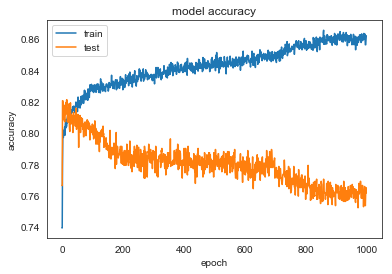

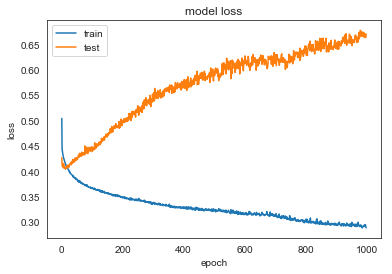

In [72]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Second Neural Net </h2>
activation function tanh
3 hidden layers

In [73]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="tanh", input_dim=45, units=14, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 200,validation_split=0.3)



Train on 3445 samples, validate on 1477 samples
Epoch 1/200
3445/3445 [==============================] - 1s 411us/step - loss: 0.4965 - acc: 0.7776 - val_loss: 0.4125 - val_acc: 0.8084
Epoch 2/200
3445/3445 [==============================] - 0s 126us/step - loss: 0.4386 - acc: 0.7890 - val_loss: 0.4054 - val_acc: 0.8206
Epoch 3/200
3445/3445 [==============================] - 0s 128us/step - loss: 0.4372 - acc: 0.7971 - val_loss: 0.4026 - val_acc: 0.8158
Epoch 4/200
3445/3445 [==============================] - 0s 130us/step - loss: 0.4349 - acc: 0.7922 - val_loss: 0.4023 - val_acc: 0.8219
Epoch 5/200
3445/3445 [==============================] - 0s 129us/step - loss: 0.4336 - acc: 0.7933 - val_loss: 0.4019 - val_acc: 0.8179
Epoch 6/200
3445/3445 [==============================] - 0s 134us/step - loss: 0.4349 - acc: 0.7930 - val_loss: 0.4033 - val_acc: 0.8158
Epoch 7/200
3445/3445 [==============================] - 0s 133us/step - loss: 0.4323 - acc: 0.7922 - val_loss: 0.4000 - val_acc: 

In [74]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[1303  181]
 [ 340  286]] 

The accuracy is 0.7530805687203791


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


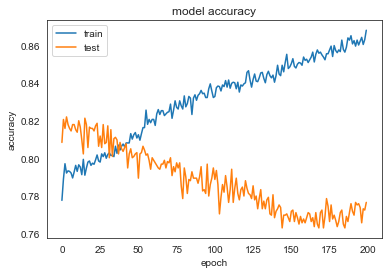

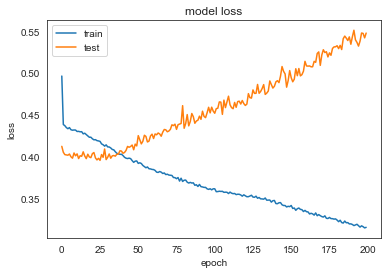

In [75]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Third Neural Net </h2>
activation function tanh
5 hidden layers

In [77]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="tanh", input_dim=45, units=14, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 200,validation_split=0.3)



Train on 3445 samples, validate on 1477 samples
Epoch 1/200
3445/3445 [==============================] - 2s 472us/step - loss: 0.4955 - acc: 0.7782 - val_loss: 0.4176 - val_acc: 0.8125
Epoch 2/200
3445/3445 [==============================] - 1s 160us/step - loss: 0.4422 - acc: 0.7919 - val_loss: 0.4087 - val_acc: 0.8131
Epoch 3/200
3445/3445 [==============================] - 0s 144us/step - loss: 0.4392 - acc: 0.7922 - val_loss: 0.4104 - val_acc: 0.8145
Epoch 4/200
3445/3445 [==============================] - 1s 187us/step - loss: 0.4395 - acc: 0.7925 - val_loss: 0.4110 - val_acc: 0.7996
Epoch 5/200
3445/3445 [==============================] - 1s 151us/step - loss: 0.4375 - acc: 0.7898 - val_loss: 0.4050 - val_acc: 0.8070
Epoch 6/200
3445/3445 [==============================] - 1s 160us/step - loss: 0.4354 - acc: 0.7916 - val_loss: 0.4098 - val_acc: 0.8064
Epoch 7/200
3445/3445 [==============================] - 1s 162us/step - loss: 0.4358 - acc: 0.7942 - val_loss: 0.4094 - val_acc: 

In [78]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[1218  266]
 [ 276  350]] 

The accuracy is 0.7431279620853081


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


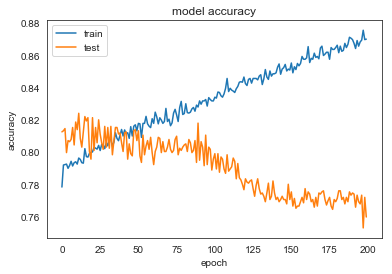

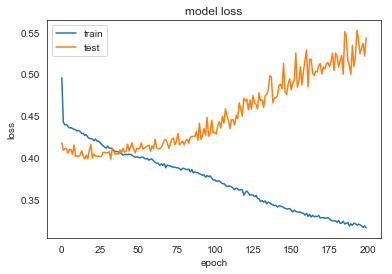

In [79]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Fourth Neural Net </h2>
activation function tanh
10 hidden layers

In [82]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="tanh", input_dim=45, units=14, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))

# Adding the sixth hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))
# Adding the seventh hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))
# Adding the eighth hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))
# Adding the ninth hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))
# Adding the tenth hidden layer
classifier.add(Dense(activation="tanh", units=14, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 200,validation_split=0.3)



Train on 3445 samples, validate on 1477 samples
Epoch 1/200
3445/3445 [==============================] - 2s 633us/step - loss: 0.5095 - acc: 0.7628 - val_loss: 0.4223 - val_acc: 0.8118
Epoch 2/200
3445/3445 [==============================] - 1s 180us/step - loss: 0.4508 - acc: 0.7803 - val_loss: 0.4239 - val_acc: 0.8050
Epoch 3/200
3445/3445 [==============================] - 1s 184us/step - loss: 0.4450 - acc: 0.7878 - val_loss: 0.4224 - val_acc: 0.8030
Epoch 4/200
3445/3445 [==============================] - 1s 177us/step - loss: 0.4500 - acc: 0.7901 - val_loss: 0.4195 - val_acc: 0.8152
Epoch 5/200
3445/3445 [==============================] - 1s 183us/step - loss: 0.4442 - acc: 0.7858 - val_loss: 0.4153 - val_acc: 0.8206
Epoch 6/200
3445/3445 [==============================] - 1s 201us/step - loss: 0.4433 - acc: 0.7855 - val_loss: 0.4111 - val_acc: 0.8037
Epoch 7/200
3445/3445 [==============================] - 1s 197us/step - loss: 0.4404 - acc: 0.7919 - val_loss: 0.4116 - val_acc: 

In [83]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[1182  302]
 [ 237  389]] 

The accuracy is 0.7445497630331753


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


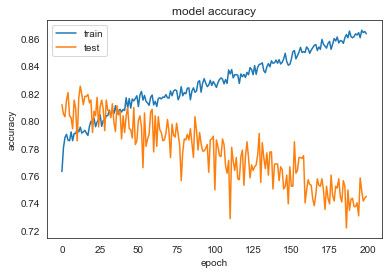

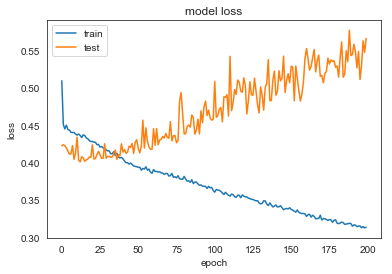

In [84]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Fifth Neural Net </h2>
activation function relu
10 hidden layers

In [85]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=45, units=14, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))

# Adding the sixth hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))
# Adding the seventh hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))
# Adding the eighth hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))
# Adding the ninth hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))
# Adding the tenth hidden layer
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 200,validation_split=0.3)



Train on 3445 samples, validate on 1477 samples
Epoch 1/200
3445/3445 [==============================] - 2s 574us/step - loss: 0.5555 - acc: 0.7393 - val_loss: 0.4393 - val_acc: 0.7664
Epoch 2/200
3445/3445 [==============================] - 1s 178us/step - loss: 0.4533 - acc: 0.7489 - val_loss: 0.4231 - val_acc: 0.7969
Epoch 3/200
3445/3445 [==============================] - 1s 177us/step - loss: 0.4434 - acc: 0.7843 - val_loss: 0.4173 - val_acc: 0.7989
Epoch 4/200
3445/3445 [==============================] - 1s 177us/step - loss: 0.4398 - acc: 0.7922 - val_loss: 0.4149 - val_acc: 0.7969
Epoch 5/200
3445/3445 [==============================] - 1s 178us/step - loss: 0.4374 - acc: 0.7855 - val_loss: 0.4119 - val_acc: 0.7976
Epoch 6/200
3445/3445 [==============================] - 1s 178us/step - loss: 0.4353 - acc: 0.7896 - val_loss: 0.4098 - val_acc: 0.8179
Epoch 7/200
3445/3445 [==============================] - 1s 180us/step - loss: 0.4343 - acc: 0.7893 - val_loss: 0.4058 - val_acc: 

In [86]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[1297  187]
 [ 309  317]] 

The accuracy is 0.7649289099526067


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


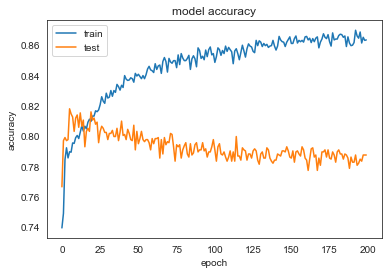

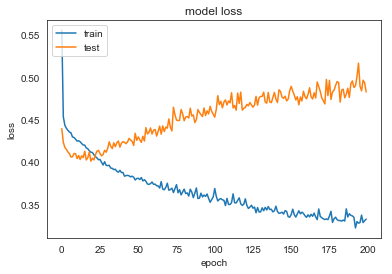

In [87]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Sixth Neural Net </h2>
activation function relu
10 hidden layers
changing the number to neurons to 50

In [88]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=45, units=50, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=50, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="relu", units=50, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="relu", units=50, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="relu", units=50, kernel_initializer="uniform"))

# Adding the sixth hidden layer
classifier.add(Dense(activation="relu", units=50, kernel_initializer="uniform"))
# Adding the seventh hidden layer
classifier.add(Dense(activation="relu", units=50, kernel_initializer="uniform"))
# Adding the eighth hidden layer
classifier.add(Dense(activation="relu", units=50, kernel_initializer="uniform"))
# Adding the ninth hidden layer
classifier.add(Dense(activation="relu", units=50, kernel_initializer="uniform"))
# Adding the tenth hidden layer
classifier.add(Dense(activation="relu", units=50, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 200,validation_split=0.3)



Train on 3445 samples, validate on 1477 samples
Epoch 1/200
3445/3445 [==============================] - 2s 637us/step - loss: 0.5118 - acc: 0.7393 - val_loss: 0.4447 - val_acc: 0.7664
Epoch 2/200
3445/3445 [==============================] - 1s 210us/step - loss: 0.4544 - acc: 0.7657 - val_loss: 0.4358 - val_acc: 0.7536
Epoch 3/200
3445/3445 [==============================] - 1s 215us/step - loss: 0.4463 - acc: 0.7779 - val_loss: 0.4307 - val_acc: 0.7874
Epoch 4/200
3445/3445 [==============================] - 1s 210us/step - loss: 0.4407 - acc: 0.7858 - val_loss: 0.4273 - val_acc: 0.7955
Epoch 5/200
3445/3445 [==============================] - 1s 226us/step - loss: 0.4279 - acc: 0.8000 - val_loss: 0.4059 - val_acc: 0.8179
Epoch 6/200
3445/3445 [==============================] - 1s 203us/step - loss: 0.4334 - acc: 0.7922 - val_loss: 0.4514 - val_acc: 0.7935
Epoch 7/200
3445/3445 [==============================] - 1s 214us/step - loss: 0.4222 - acc: 0.8017 - val_loss: 0.4223 - val_acc: 

In [89]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[1260  224]
 [ 335  291]] 

The accuracy is 0.7350710900473933


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


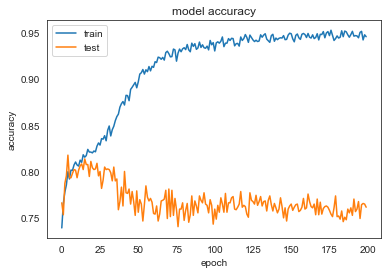

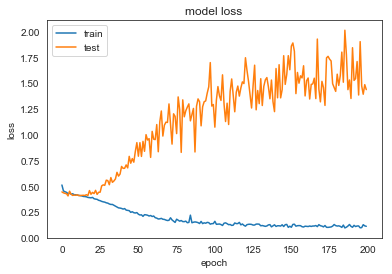

In [90]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Seventh Neural Net </h2>
activation function tanh
10 hidden layers
changing the number to neurons to 50

In [91]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="tanh", input_dim=45, units=50, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="tanh", units=50, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="tanh", units=50, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="tanh", units=50, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="tanh", units=50, kernel_initializer="uniform"))

# Adding the sixth hidden layer
classifier.add(Dense(activation="tanh", units=50, kernel_initializer="uniform"))
# Adding the seventh hidden layer
classifier.add(Dense(activation="tanh", units=50, kernel_initializer="uniform"))
# Adding the eighth hidden layer
classifier.add(Dense(activation="tanh", units=50, kernel_initializer="uniform"))
# Adding the ninth hidden layer
classifier.add(Dense(activation="tanh", units=50, kernel_initializer="uniform"))
# Adding the tenth hidden layer
classifier.add(Dense(activation="tanh", units=50, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 200,validation_split=0.3)



Train on 3445 samples, validate on 1477 samples
Epoch 1/200
3445/3445 [==============================] - 2s 660us/step - loss: 0.4842 - acc: 0.7672 - val_loss: 0.4087 - val_acc: 0.8172
Epoch 2/200
3445/3445 [==============================] - 1s 243us/step - loss: 0.4507 - acc: 0.7774 - val_loss: 0.4093 - val_acc: 0.8213
Epoch 3/200
3445/3445 [==============================] - 1s 204us/step - loss: 0.4530 - acc: 0.7791 - val_loss: 0.4367 - val_acc: 0.7996
Epoch 4/200
3445/3445 [==============================] - 1s 206us/step - loss: 0.4500 - acc: 0.7794 - val_loss: 0.4094 - val_acc: 0.8246
Epoch 5/200
3445/3445 [==============================] - 1s 206us/step - loss: 0.4499 - acc: 0.7823 - val_loss: 0.4080 - val_acc: 0.8097
Epoch 6/200
3445/3445 [==============================] - 1s 202us/step - loss: 0.4466 - acc: 0.7884 - val_loss: 0.4350 - val_acc: 0.7664
Epoch 7/200
3445/3445 [==============================] - 1s 211us/step - loss: 0.4459 - acc: 0.7840 - val_loss: 0.4068 - val_acc: 

In [92]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[1193  291]
 [ 229  397]] 

The accuracy is 0.7535545023696683


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


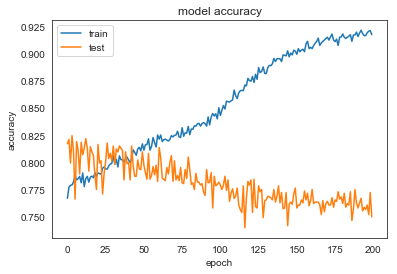

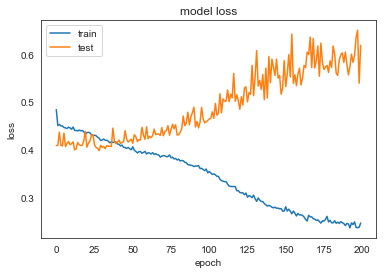

In [93]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Eighth Neural Net </h2>
activation function tanh
10 hidden layers
changing the number to neurons to 100

In [179]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="tanh", input_dim=45, units=100, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="tanh", units=100, kernel_initializer="uniform"))

# Adding the third hidden layer
classifier.add(Dense(activation="tanh", units=100, kernel_initializer="uniform"))

# Adding the fourth hidden layer
classifier.add(Dense(activation="tanh", units=100, kernel_initializer="uniform"))

# Adding the fifth hidden layer
classifier.add(Dense(activation="tanh", units=100, kernel_initializer="uniform"))

# Adding the sixth hidden layer
classifier.add(Dense(activation="tanh", units=100, kernel_initializer="uniform"))
# Adding the seventh hidden layer
classifier.add(Dense(activation="tanh", units=100, kernel_initializer="uniform"))
# Adding the eighth hidden layer
classifier.add(Dense(activation="tanh", units=100, kernel_initializer="uniform"))
# Adding the ninth hidden layer
classifier.add(Dense(activation="tanh", units=100, kernel_initializer="uniform"))
# Adding the tenth hidden layer
classifier.add(Dense(activation="tanh", units=100, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 200,validation_split=0.3)



Train on 3445 samples, validate on 1477 samples
Epoch 1/200
3445/3445 [==============================] - 3s 928us/step - loss: 0.4843 - acc: 0.7675 - val_loss: 0.4132 - val_acc: 0.8145
Epoch 2/200
3445/3445 [==============================] - 1s 340us/step - loss: 0.4625 - acc: 0.7739 - val_loss: 0.4481 - val_acc: 0.7664
Epoch 3/200
3445/3445 [==============================] - 1s 331us/step - loss: 0.4585 - acc: 0.7837 - val_loss: 0.4292 - val_acc: 0.7928
Epoch 4/200
3445/3445 [==============================] - 1s 346us/step - loss: 0.4512 - acc: 0.7806 - val_loss: 0.4585 - val_acc: 0.7908
Epoch 5/200
3445/3445 [==============================] - 1s 352us/step - loss: 0.4615 - acc: 0.7692 - val_loss: 0.4185 - val_acc: 0.8064
Epoch 6/200
3445/3445 [==============================] - 1s 347us/step - loss: 0.4544 - acc: 0.7782 - val_loss: 0.4416 - val_acc: 0.7664
Epoch 7/200
3445/3445 [==============================] - 1s 343us/step - loss: 0.4502 - acc: 0.7832 - val_loss: 0.4058 - val_acc: 

In [181]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

[[1484    0]
 [ 626    0]] 

The accuracy is 0.7033175355450237


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


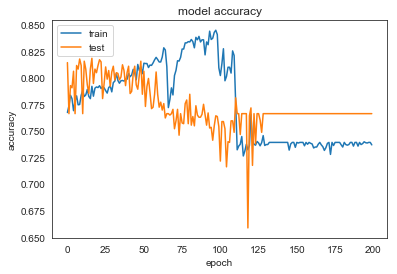

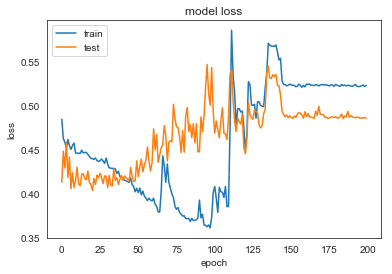

In [182]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h1> KNN for Dataset 2</h1>
<h2>Euclidian Distance</h2>
First Experiment k=5

In [97]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)

cm

array([[1271,  213],
       [ 342,  284]], dtype=int64)

In [98]:
report=classification_report(y_test,y_pred)
accu_KNN_5=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=5\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using K-cross validation with 10 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds\n",std*100,end='\n')


KNN with n=5


The Confusion Matrix
 [[1271  213]
 [ 342  284]]
The Classification report
               precision    recall  f1-score   support

           0       0.79      0.86      0.82      1484
           1       0.57      0.45      0.51       626

    accuracy                           0.74      2110
   macro avg       0.68      0.66      0.66      2110
weighted avg       0.72      0.74      0.73      2110

The Accuracy score with only 1 Training and Testing Data Set
 73.69668246445498
The mean of the accuracy scores with using K-cross validation with 10 folds
 76.77792264252648
The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds
 1.4936746640125378


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

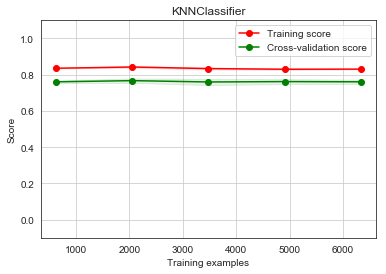

In [71]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, X, y,cv=10,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show

<h2> KNN with k=3 and euclidian distance</h2>

In [99]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)

cm

array([[1242,  242],
       [ 346,  280]], dtype=int64)

In [101]:
report=classification_report(y_test,y_pred)
accu_KNN_5=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=3\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using K-cross validation with 10 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds\n",std*100,end='\n')


KNN with n=3


The Confusion Matrix
 [[1242  242]
 [ 346  280]]
The Classification report
               precision    recall  f1-score   support

           0       0.78      0.84      0.81      1484
           1       0.54      0.45      0.49       626

    accuracy                           0.72      2110
   macro avg       0.66      0.64      0.65      2110
weighted avg       0.71      0.72      0.71      2110

The Accuracy score with only 1 Training and Testing Data Set
 72.13270142180095
The mean of the accuracy scores with using K-cross validation with 10 folds
 75.03135538960848
The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds
 1.3996390002494916


W1104 18:13:10.916254 18972 legend.py:1289] No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

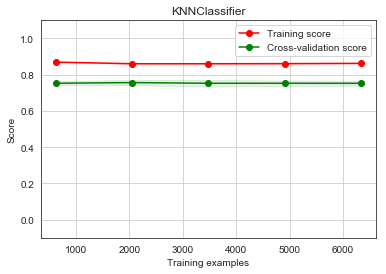

In [104]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, X, y,cv=10,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show

<h2>Grid Search for K with Euclidian Distance </h2>

In [107]:
#playing around with the KNN with n parameter to get the best n
#performing grid search to find the best value of n in KNN and the most efficient values for Hyperparameters
# Applying Grid Search to find the best model and the best parameters
# Fitting a general classifier to use in Grid Search to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(metric = 'minkowski')
classifier.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': range(1,40),'p':[2]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy,end='\n')
print(best_parameters,end='\n')

0.7923608289313288
{'n_neighbors': 38, 'p': 2}


Text(0, 0.5, 'Mean Error')

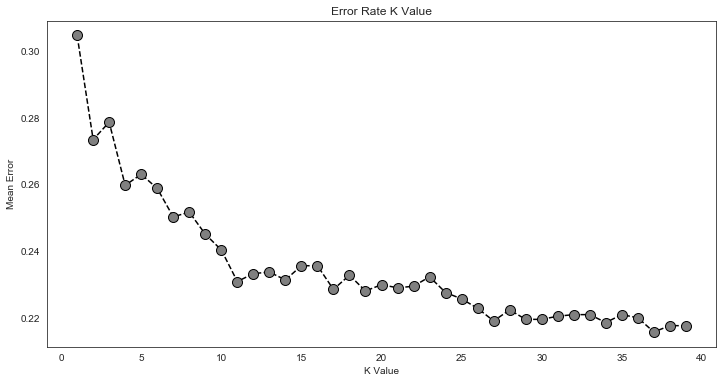

In [106]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i,p=2,metric='minkowski')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='grey', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


<h2>KNN with the Best values reported from Grid Serach for Euclidian Distance</h2>
K=38 

In [108]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 38, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)

cm

array([[1326,  158],
       [ 301,  325]], dtype=int64)

In [110]:
report=classification_report(y_test,y_pred)
accu_KNN_5=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=38\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using K-cross validation with 10 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds\n",std*100,end='\n')


KNN with n=38


The Confusion Matrix
 [[1326  158]
 [ 301  325]]
The Classification report
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      1484
           1       0.67      0.52      0.59       626

    accuracy                           0.78      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.77      0.78      0.77      2110

The Accuracy score with only 1 Training and Testing Data Set
 78.24644549763033
The mean of the accuracy scores with using K-cross validation with 10 folds
 79.23710850118339
The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds
 1.4886407640989432


W1104 18:17:52.981558 18972 legend.py:1289] No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

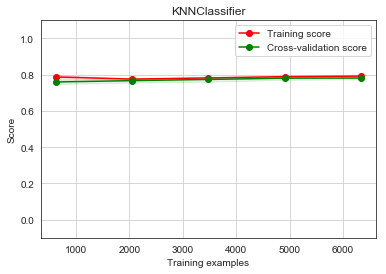

In [111]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, X, y,cv=10,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show

<h2>  KNN with Manhatten Distance</h2>
First experiment k=5

In [112]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)

cm

array([[1269,  215],
       [ 330,  296]], dtype=int64)

In [113]:
report=classification_report(y_test,y_pred)
accu_KNN_5=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=5\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using K-cross validation with 10 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds\n",std*100,end='\n')


KNN with n=5


The Confusion Matrix
 [[1269  215]
 [ 330  296]]
The Classification report
               precision    recall  f1-score   support

           0       0.79      0.86      0.82      1484
           1       0.58      0.47      0.52       626

    accuracy                           0.74      2110
   macro avg       0.69      0.66      0.67      2110
weighted avg       0.73      0.74      0.73      2110

The Accuracy score with only 1 Training and Testing Data Set
 74.17061611374407
The mean of the accuracy scores with using K-cross validation with 10 folds
 76.77837631398049
The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds
 1.5198214027538801


W1104 18:21:37.613078 18972 legend.py:1289] No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

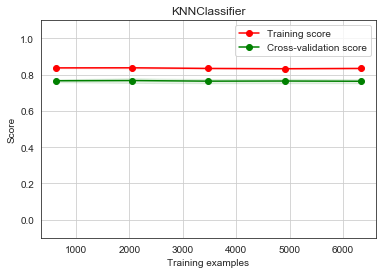

In [114]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, X, y,cv=10,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show

<h2>K=3 with Manhatten distance</h2>

In [115]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)

cm

array([[1252,  232],
       [ 342,  284]], dtype=int64)

In [116]:
report=classification_report(y_test,y_pred)
accu_KNN_5=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=5\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using K-cross validation with 10 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds\n",std*100,end='\n')


KNN with n=5


The Confusion Matrix
 [[1252  232]
 [ 342  284]]
The Classification report
               precision    recall  f1-score   support

           0       0.79      0.84      0.81      1484
           1       0.55      0.45      0.50       626

    accuracy                           0.73      2110
   macro avg       0.67      0.65      0.66      2110
weighted avg       0.72      0.73      0.72      2110

The Accuracy score with only 1 Training and Testing Data Set
 72.79620853080569
The mean of the accuracy scores with using K-cross validation with 10 folds
 75.3358620541874
The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds
 0.8922068690521904


W1104 18:23:43.677855 18972 legend.py:1289] No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

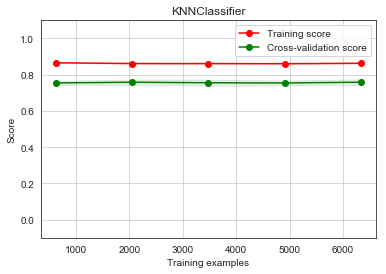

In [117]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, X, y,cv=10,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show

<h2>Grid Search for K with Manhatten Distance </h2>

In [119]:
#playing around with the KNN with n parameter to get the best n
#performing grid search to find the best value of n in KNN and the most efficient values for Hyperparameters
# Applying Grid Search to find the best model and the best parameters
# Fitting a general classifier to use in Grid Search to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(metric = 'minkowski')
classifier.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': range(1,40),'p':[1]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy,end='\n')
print(best_parameters,end='\n')

0.7919544900446973
{'n_neighbors': 38, 'p': 1}


Text(0, 0.5, 'Mean Error')

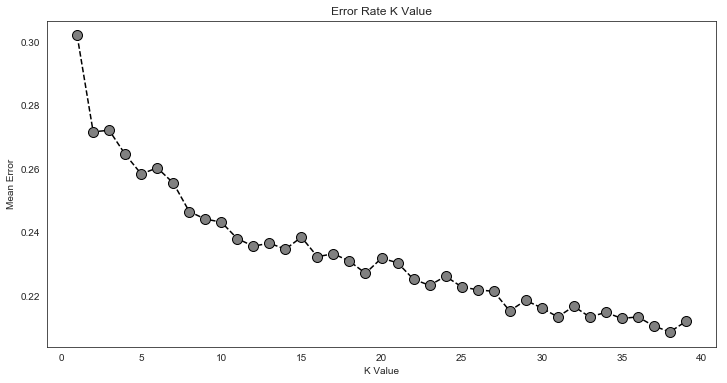

In [120]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i,p=1,metric='minkowski')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='grey', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


<h2>KNN with the Best values reported from Grid Serach for Manhatten Distance</h2>
K=38 

In [122]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 38, metric = 'minkowski', p = 1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)

cm

array([[1323,  161],
       [ 279,  347]], dtype=int64)

In [123]:
report=classification_report(y_test,y_pred)
accu_KNN_5=accuracy_score(y_test,y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean=accuracies.mean()
std=accuracies.std()
from IPython.display import Markdown, display
bold = "\033[1m"
reset = "\033[0;0m"

print(bold+"KNN with n=5\n\n"+reset)

print("The Confusion Matrix\n",cm,end='\n')
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",accu_KNN_5*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using K-cross validation with 10 folds\n",mean*100,end='\n')
print("The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds\n",std*100,end='\n')


KNN with n=5


The Confusion Matrix
 [[1323  161]
 [ 279  347]]
The Classification report
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1484
           1       0.68      0.55      0.61       626

    accuracy                           0.79      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.78      0.79      0.78      2110

The Accuracy score with only 1 Training and Testing Data Set
 79.14691943127961
The mean of the accuracy scores with using K-cross validation with 10 folds
 79.19645826261248
The Standard Deviation of the accuracy scores with using K-cross validation with 10 folds
 1.3105293561720082


W1104 18:28:07.770514 18972 legend.py:1289] No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

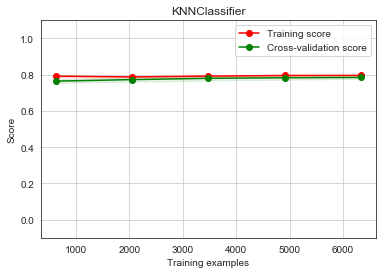

In [124]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, X, y,cv=10,n_jobs=-1)
train_sizes 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("KNNClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show